In [1]:
import pandas as pd
import geopandas as gpd
import os

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/home/fterroso/python/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
matrix_type= 'gravity_model' #or 'distance', 'gravity_model', 'contiguity', 'ylag', 'queen_gravity_model'
pre_len=1

In [3]:
trips_data = pd.read_csv(os.path.join('data','trips_time_series_all_inter.csv'),index_col=0)
trips_data= trips_data.fillna(0)
trips_data['total']= trips_data.sum(axis=1)
trips_data['Improves with weather']= 'No'
#trips_data.loc['total']= trips_data.sum(axis=0)
trips_data.head()

,20200221_00,20200221_01,20200221_02,20200221_03,20200221_04,20200221_05,20200221_06,20200221_07,20200221_08,20200221_09,...,20201130_16,20201130_17,20201130_18,20201130_19,20201130_20,20201130_21,20201130_22,20201130_23,total,Improves with weather
01001_AM,291.654,129.650,123.822,280.810,282.418,518.179,736.074,1253.000,981.544,893.510,...,1073.847,1147.206,650.740,648.024,563.314,735.201,258.461,230.591,4189691.344,No
01002,192.529,149.992,50.547,73.097,208.114,616.786,732.075,779.587,638.112,734.767,...,615.822,826.882,580.843,378.512,381.695,407.566,124.729,106.744,2441188.659,No
01010_AM,92.726,50.822,37.895,19.586,91.560,396.531,457.180,591.326,516.919,471.008,...,559.796,476.880,354.807,215.711,216.593,277.574,119.830,52.331,1988351.484,No
01031_AM,97.674,64.901,92.150,62.669,109.056,208.462,469.924,691.565,645.793,789.906,...,682.578,582.456,603.958,344.157,286.541,269.655,159.443,118.029,3330112.565,No
01036,173.565,118.227,204.784,219.318,409.485,779.103,1091.613,969.506,845.084,875.701,...,681.116,746.917,704.784,413.711,441.988,575.437,319.760,68.968,3408282.950,No


In [4]:
gnn_base_test_metrics_df = pd.read_csv(os.path.join('data', f'gnn_naive_test_metrics_gravity_model.csv'), index_col='area_id')

In [5]:
gnn_base_test_metrics_df.head()

,Unnamed: 0,gnn-MAE,gnn-MSE,gnn-RMSE,naive-MAE,naive-MSE,naive-RMSE
area_id,,,,,,,
01001_AM,0,97.028504,18698.806028,136.743578,156.029249,45910.420469,214.267171
01002,1,77.622980,10563.873059,102.780704,119.004543,24503.809545,156.536927
01010_AM,2,66.552801,8167.135691,90.372206,99.341722,18573.031657,136.282910
01031_AM,3,112.686855,23646.023189,153.772635,111.199473,22496.806037,149.989353
01036,4,112.154167,21547.425136,146.790412,146.149875,39890.098894,199.725058


In [6]:
gnn_base_test_metrics_df.mean()

Unnamed: 0      1421.500000
gnn-MAE          139.144568
gnn-MSE        76730.452941
gnn-RMSE         188.863936
naive-MAE        208.750213
naive-MSE     166672.067183
naive-RMSE       275.393001
dtype: float64

In [7]:
test_metrics_df= pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_{}_{}_multivariate.csv'.format(matrix_type, 1)), index_col='area_id')
test_metrics_3_df= pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_{}_{}_multivariate.csv'.format(matrix_type, 3)), index_col='area_id')
test_metrics_6_df= pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_{}_{}_multivariate.csv'.format(matrix_type, 6)), index_col='area_id')
test_metrics_12_df= pd.read_csv(os.path.join('data', 'gnn_naive_test_metrics_{}_{}_multivariate.csv'.format(matrix_type, 12)), index_col='area_id')

In [8]:
test_metrics_df.mean()

Unnamed: 0      1421.500000
gnn-MAE          206.388949
gnn-MSE       196953.628337
gnn-RMSE         282.300613
dtype: float64

In [29]:
test_metrics_df.std()

Unnamed: 0       821.136408
gnn-MAE          252.180507
gnn-MSE       893711.976017
gnn-RMSE         342.492682
dtype: float64

In [9]:
test_metrics_3_df.mean()

Unnamed: 0      1421.500000
gnn-MAE          273.089513
gnn-MSE       361923.161751
gnn-RMSE         376.584729
dtype: float64

In [30]:
test_metrics_3_df.std()

Unnamed: 0    8.211364e+02
gnn-MAE       3.396787e+02
gnn-MSE       1.586234e+06
gnn-RMSE      4.692382e+02
dtype: float64

In [10]:
test_metrics_6_df.mean()

Unnamed: 0      1421.500000
gnn-MAE          300.036798
gnn-MSE       381354.557807
gnn-RMSE         386.284108
dtype: float64

In [31]:
test_metrics_6_df.std()

Unnamed: 0    8.211364e+02
gnn-MAE       3.898617e+02
gnn-MSE       1.611739e+06
gnn-RMSE      4.818929e+02
dtype: float64

In [11]:
test_metrics_12_df.mean()

Unnamed: 0      1421.500000
gnn-MAE          300.965945
gnn-MSE       427649.183233
gnn-RMSE         416.326082
dtype: float64

In [32]:
test_metrics_12_df.std()

Unnamed: 0    8.211364e+02
gnn-MAE       3.746371e+02
gnn-MSE       1.941091e+06
gnn-RMSE      5.043919e+02
dtype: float64

In [12]:
test_metrics_df.head()

,Unnamed: 0,gnn-MAE,gnn-MSE,gnn-RMSE
area_id,,,,
01001_AM,0,143.119759,43340.099349,208.182851
01002,1,103.975173,20597.659505,143.518847
01010_AM,2,91.596957,16029.586829,126.608005
01031_AM,3,101.339658,18189.092986,134.866945
01036,4,158.774261,47650.667627,218.290329


In [13]:
diff_df = test_metrics_df -gnn_base_test_metrics_df

In [14]:
diff_df.head()

,Unnamed: 0,gnn-MAE,gnn-MSE,gnn-RMSE,naive-MAE,naive-MSE,naive-RMSE
area_id,,,,,,,
01001_AM,0,46.091255,24641.293321,71.439273,NaN,NaN,NaN
01002,0,26.352193,10033.786447,40.738143,NaN,NaN,NaN
01010_AM,0,25.044155,7862.451138,36.235798,NaN,NaN,NaN
01031_AM,0,-11.347197,-5456.930203,-18.905689,NaN,NaN,NaN
01036,0,46.620094,26103.242490,71.499916,NaN,NaN,NaN


In [15]:
q_RMSE= diff_df['gnn-RMSE'].quantile(q=0.9)
q_MSE= diff_df['gnn-MSE'].quantile(q=0.9)
q_MAE= diff_df['gnn-MAE'].quantile(q=0.9)

q_MSE, q_RMSE, q_MAE

(192592.33480597788, 229.70178123597026, 162.43265114345274)

In [16]:
#zones_with_improvement_df = diff_df[(diff_df['gnn-RMSE']<0) & (diff_df['gnn-MSE']<0) & (diff_df['gnn-MAE']<0)]
zones_with_improvement_df = diff_df[(diff_df['gnn-RMSE']<0) | (diff_df['gnn-MSE']<0) | (diff_df['gnn-MAE']<0)]

In [17]:
zones_with_improvement_df

,Unnamed: 0,gnn-MAE,gnn-MSE,gnn-RMSE,naive-MAE,naive-MSE,naive-RMSE
area_id,,,,,,,
01031_AM,0,-11.347197,-5456.930203,-18.905689,NaN,NaN,NaN
03028_AM,0,-66.245237,-31269.650425,-59.605455,NaN,NaN,NaN
03055,0,-12.095484,-4454.751388,-7.481991,NaN,NaN,NaN
0309901,0,-1.209478,997.900564,4.074107,NaN,NaN,NaN
03902,0,4.497859,-6037.931765,-13.948399,NaN,NaN,NaN
...,...,...,...,...,...,...,...
48017,0,-5.368083,-2244.447530,-7.811882,NaN,NaN,NaN
48068_AM,0,-24.104534,-10565.352133,-32.681349,NaN,NaN,NaN
33072_AM,0,18.933242,-474.512296,-3.225514,NaN,NaN,NaN


In [18]:
zones_with_degradation_df = diff_df[(diff_df['gnn-RMSE']>q_RMSE) | 
                                    (diff_df['gnn-MSE']> q_MSE) | 
                                    (diff_df['gnn-MAE']>q_MAE)]

In [19]:
trips_data.loc[zones_with_improvement_df.index,'Improves with weather']= 'Yes'

/home/fterroso/python/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


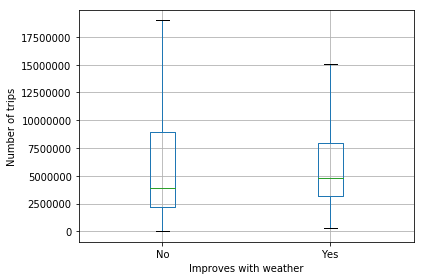

In [20]:
ax= trips_data.boxplot(column='total', by='Improves with weather', showfliers=False);
ax.set_ylabel('Number of trips');
ax.yaxis.get_major_formatter().set_scientific(False)
#remove title and subtitle
plt.title('' )
plt.suptitle('')
plt.tight_layout()
plt.savefig(os.path.join('figs','comparision_improvement_data.png'))

In [21]:
zones_gdf = gpd.read_file(os.path.join('data', 'zones_with_airports.geojson'),driver='GeoJSON', index_col='ID')
zones_gdf = zones_gdf.set_index('ID')

In [22]:
zones_gdf['MAE']= diff_df['gnn-MAE']

In [23]:
zones_gdf.head()

,centroidx,centroidy,close_airport,dist_to_airport,geometry,MAE
ID,,,,,,
2408910,-5.555105,42.598490,LELN,8.290485,"POLYGON ((-5.54818 42.59582, -5.54789 42.59370...",34.761848
22117_AM,0.326193,42.172726,LEDA,52.360679,"POLYGON ((0.31381 42.06360, 0.31661 42.05520, ...",21.542135
2305009,-3.813647,37.743443,LEGR,61.767498,"POLYGON ((-3.79764 37.76442, -3.79796 37.76418...",38.235112
07058_AM,2.854266,39.806728,LESB,26.495203,"POLYGON ((2.84351 39.73820, 2.84115 39.74263, ...",21.922553
2305006,-3.822952,37.772942,LEGR,65.089033,"POLYGON ((-3.79717 37.77325, -3.79643 37.77350...",37.536090


In [24]:
target_airports_gdf= gpd.read_file(os.path.join('data', 'airport_locations.geojson'),driver='GeoJSON')

In [25]:
canary_zones_gdf= zones_gdf[zones_gdf['close_airport'].isin(['GCTS', 'GCRR', 'GCLP'])]

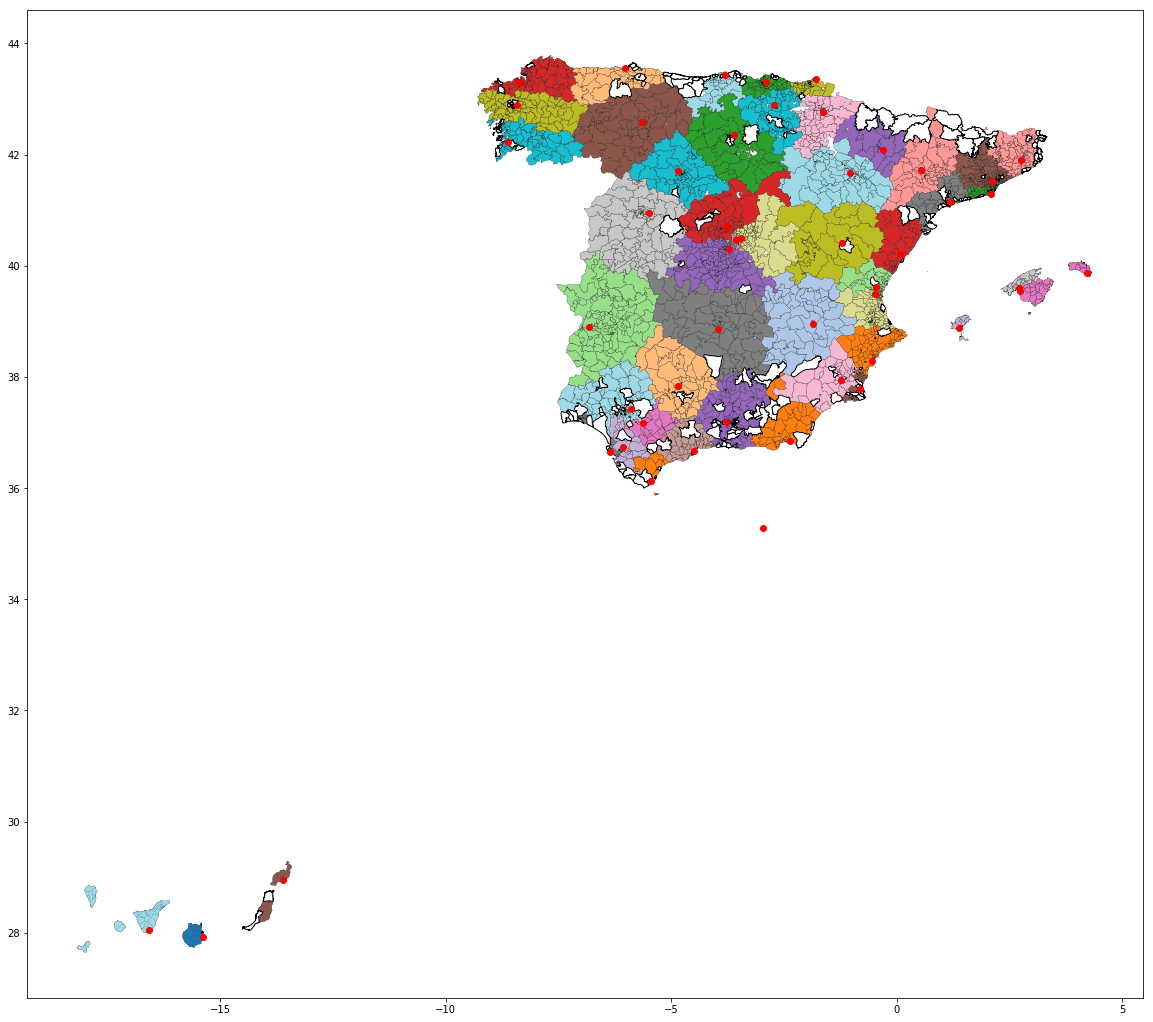

In [26]:
ax=zones_gdf.plot(column='close_airport', edgecolor='k',
                   linewidth=0.2, figsize=(20,20), cmap = 'tab20');
canary_zones_gdf.plot(ax=ax, column='close_airport', cmap='tab20')
zones_gdf.loc[zones_with_improvement_df.index].plot(ax=ax, color='white', edgecolor='black',
                                                    linewidth=0.9);

target_airports_gdf.plot(ax=ax, color='red');
plt.savefig(os.path.join('figs', f'improvement_accuracy_w_weather_{pre_len}_2.png'))

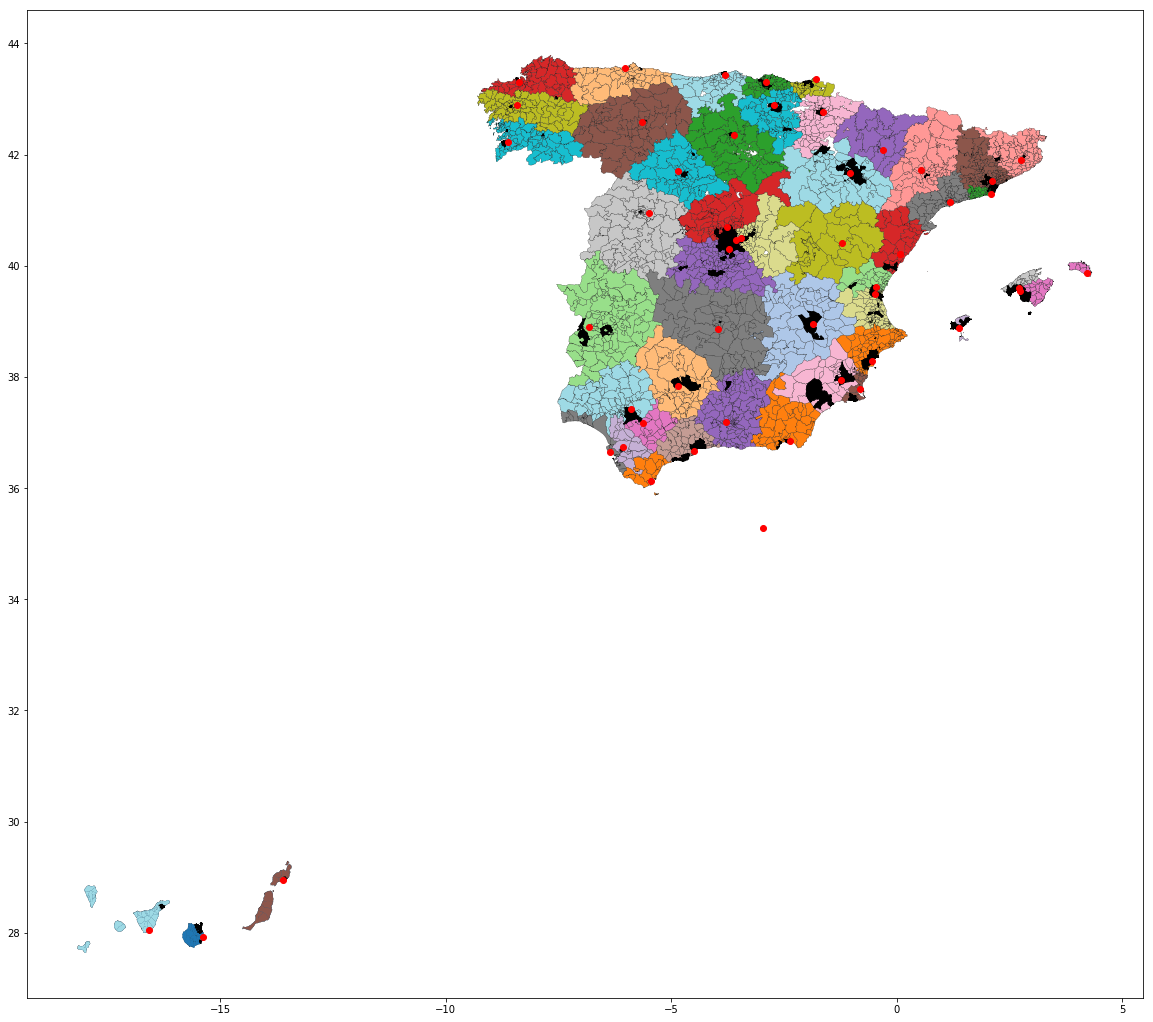

In [27]:
ax=zones_gdf.plot(column='close_airport', edgecolor='k',
                   linewidth=0.2, figsize=(20,20), cmap = 'tab20');
canary_zones_gdf.plot(ax=ax, column='close_airport', cmap='tab20')

zones_gdf.loc[zones_with_degradation_df.index].plot(ax=ax, color='black', edgecolor='black',
                                                    linewidth=0.9);

target_airports_gdf.plot(ax=ax, color='red');
plt.savefig(os.path.join('figs', f'degradation_accuracy_w_weather_{pre_len}_2.png'))

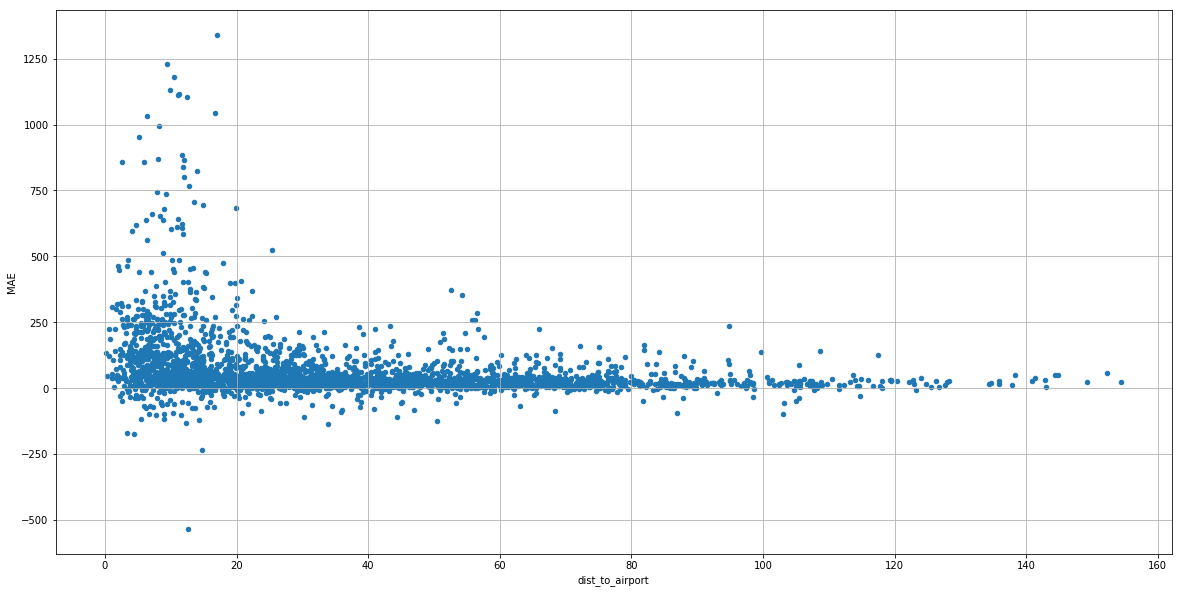

In [28]:
df = zones_gdf[['dist_to_airport', 'MAE']]
df.plot.scatter(x='dist_to_airport', y='MAE', figsize=(20,10), grid=True);